In [1]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# authenticate
credential = DefaultAzureCredential()

SUBSCRIPTION = "a3c15ce6-40ee-4f4c-8e41-c54ae5dcd096"
RESOURCE_GROUP = "vutukurusrilekha-rg"
WS_NAME = "fathom-net-kaggle-comp"
# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id=SUBSCRIPTION,
    resource_group_name=RESOURCE_GROUP,
    workspace_name=WS_NAME,
)

In [4]:
# Verify that the handle works correctly.
# If you ge an error here, modify your SUBSCRIPTION, RESOURCE_GROUP, and WS_NAME in the previous cell.
ws = ml_client.workspaces.get(WS_NAME)
print(ws.location, ":", ws.resource_group)

westus : vutukurusrilekha-rg


In [5]:
print("starting training...")

starting training...


In [6]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class MarineDataset(Dataset):
    def __init__(self, base_path, image_folder, roi_folder, annotations_csv, transform=None):
        self.base_path = base_path
        self.image_folder = image_folder
        self.roi_folder = roi_folder
        self.annotations = pd.read_csv(os.path.join(base_path, annotations_csv))
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        row = self.annotations.iloc[idx]
        roi_path = os.path.join(self.base_path, self.roi_folder, row['path'])  # ROI image
        label = row['label']  # Taxonomic classification

        image = Image.open(roi_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = MarineDataset("dataset/train/", "images/", "roi/", "annotations.csv", transform=transform)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..-0.63668835].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6301525..2.129035].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5321132..2.465708].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2959158..-0.022408951].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.57667613..0.9754903].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.3088455].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.63

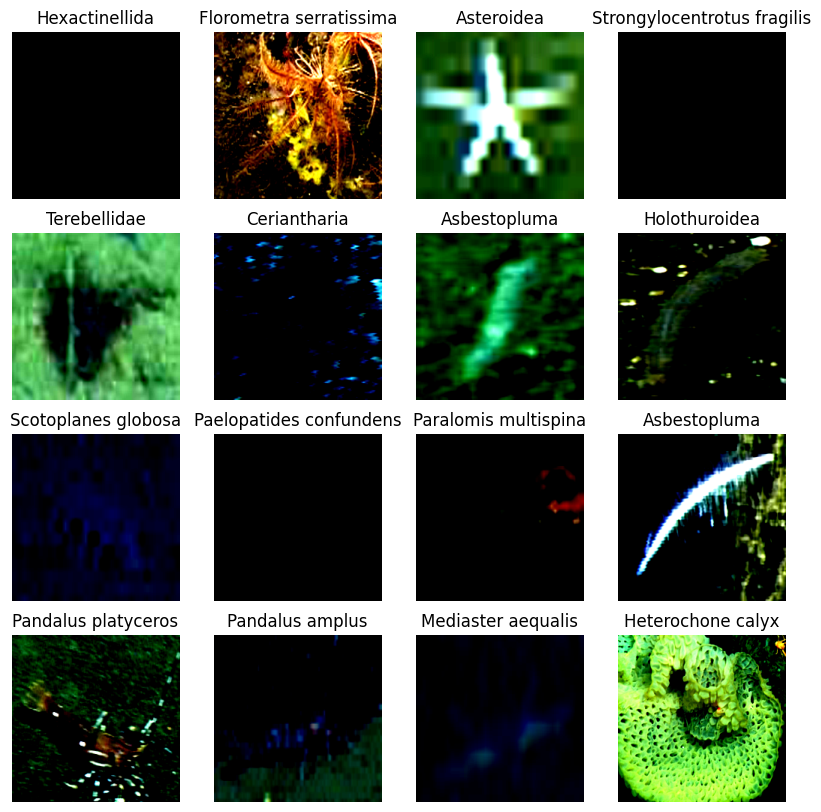

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of data
data_iter = iter(dataloader)
images, labels = next(data_iter)

# Convert images back to numpy format for visualization
images = images.numpy()

# Plot images in a grid
fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # Adjust grid size as needed

for i, ax in enumerate(axes.flatten()):
    if i < len(images):  # Ensure we don't exceed the batch size
        img = np.transpose(images[i], (1, 2, 0))  # Convert from tensor format
        ax.imshow(img)
        ax.set_title(labels[i])  # Display label
        ax.axis("off")

plt.show()